This is a Linear Regression model building from the scratch.

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Here is the Linear Regression Model class with training and predicting functions with given data X and y.

In [116]:
class LinearRegression:
    def __init__(self, learning_rate, num_itiration):
        self.learning_rate = learning_rate
        self.num_itiration = num_itiration

    def train(self, X,y):

        # Convert X to a numpy array
        X = np.array(X)
        y = np.array(y)
        
        num_samples, num_features = X.shape
        self.weight = np.zeros(num_features)
        self.bias =0 
        X_transposed = np.transpose(X) 
        
        for i in range(self.num_itiration):
            y_pred = np.dot(X, self.weight) + self.bias
            dw = 2/num_samples * np.dot(X_transposed,(y_pred-y))
            db = 2/num_samples * (y_pred-y)

            self.weight= self.weight - self.learning_rate*dw
            self.bias = self.bias - self.learning_rate*db
            
    def predict(self, X):
        y_pred = np.dot(X, self.weight) + self.bias
        return y_pred
            

use the above class for training the model and predicting values.

In [117]:
dataset = pd.read_csv("insurance.csv")
dataset.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [118]:
# Apply one-hot encoding to the 'region' and 'sex' columns
encoded_region = pd.get_dummies(dataset["region"], prefix="region").astype(int)
encoded_sex = pd.get_dummies(dataset["sex"], prefix="sex").astype(int)
encoded_smoker = pd.get_dummies(dataset["smoker"], prefix="smoker").astype(int)

# Concatenate the encoded columns back to the dataset
dataset = pd.concat([dataset, encoded_region, encoded_sex, encoded_smoker], axis=1)

# Optionally, drop the original 'region' and 'sex' columns if needed
dataset = dataset.drop(columns=["region", "sex", "smoker"])

# Display the updated dataset
print(dataset.head())
dataset.dtypes

   age     bmi  children      charges  region_northeast  region_northwest  \
0   19  27.900         0  16884.92400                 0                 0   
1   18  33.770         1   1725.55230                 0                 0   
2   28  33.000         3   4449.46200                 0                 0   
3   33  22.705         0  21984.47061                 0                 1   
4   32  28.880         0   3866.85520                 0                 1   

   region_southeast  region_southwest  sex_female  sex_male  smoker_no  \
0                 0                 1           1         0          0   
1                 1                 0           0         1          1   
2                 1                 0           0         1          1   
3                 0                 0           0         1          1   
4                 0                 0           0         1          1   

   smoker_yes  
0           1  
1           0  
2           0  
3           0  
4           

age                   int64
bmi                 float64
children              int64
charges             float64
region_northeast      int32
region_northwest      int32
region_southeast      int32
region_southwest      int32
sex_female            int32
sex_male              int32
smoker_no             int32
smoker_yes            int32
dtype: object

<Figure size 640x480 with 0 Axes>

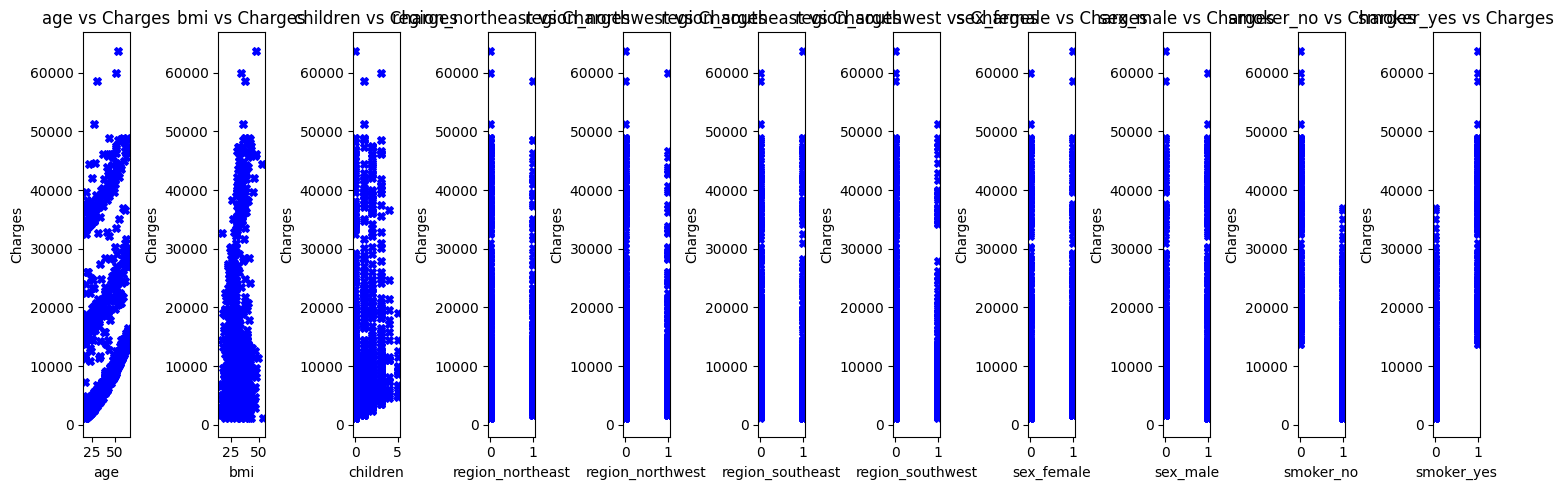

In [119]:

X = dataset.drop(columns = "charges")
y = dataset["charges"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)



fig = plt.figure()

# Plot each feature in X against y (charges)
fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))  # Adjust figsize as needed

for i, column in enumerate(X.columns):
    axes[i].scatter(X_train[column], y_train, color="b", s=30, marker="X")
    axes[i].set_xlabel(column)  # Label for the x-axis
    axes[i].set_ylabel("Charges")  # Label for the y-axis
    axes[i].set_title(f"{column} vs Charges")  # Title of the plot

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()

In [124]:
model = LinearRegression(learning_rate=0.001, num_itiration=1000)
model.train(X, y)


C:\Users\talla\AppData\Local\Temp\ipykernel_3496\3880234911.py:22: RuntimeWarning: invalid value encountered in subtract
  self.weight= self.weight - self.learning_rate*dw
